#  Assignment (7) : Clustering ( H-Clustering, K-Means, DB-Scan)

### Example (1) : Crime Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [3]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data.shape

(50, 5)

In [4]:
# Normaize the data to eliminate the effect of measuring unit
from sklearn.preprocessing import normalize
crime_norm = pd.DataFrame(crime_data.iloc[0:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
crime_norm2 = pd.DataFrame(norm.fit_transform(crime_norm))
crime_norm2.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


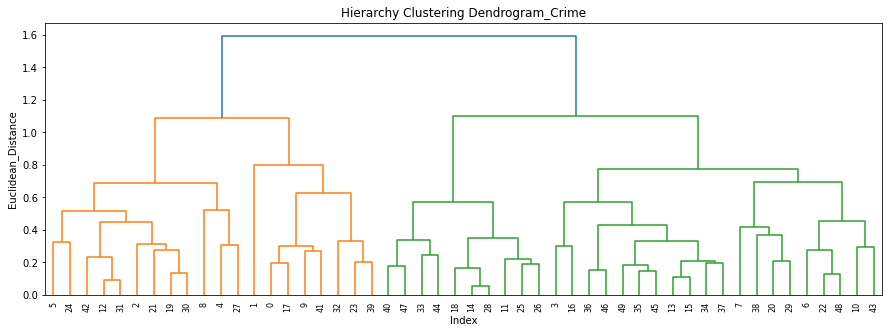

In [6]:
# Method 1 : H- Clustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage

crime_dend = linkage(crime_norm2, method='complete')
plt.figure(figsize=(15, 5))
plt.xlabel('Index')
plt.ylabel('Euclidean_Distance')
plt.title('Hierarchy Clustering Dendrogram_Crime')
dend = shc.dendrogram(crime_dend)



In [7]:
# Clustering of Observations

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage ="complete", affinity ="euclidean")
cluster.fit(crime_norm2)
cluster.fit_predict(crime_norm)


array([1, 1, 1, 0, 1, 0, 4, 1, 3, 0, 2, 4, 1, 4, 2, 4, 4, 1, 2, 1, 0, 1,
       2, 1, 0, 4, 4, 1, 2, 0, 1, 1, 3, 2, 4, 0, 0, 4, 0, 1, 2, 0, 0, 4,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [8]:
cluster_labels=pd.Series(cluster.labels_)
crime_norm['clusters_H']= cluster_labels     # creating a  new column and assigning it to new column 
crime_norm.head()

,Murder,Assault,UrbanPop,Rape,clusters_H
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


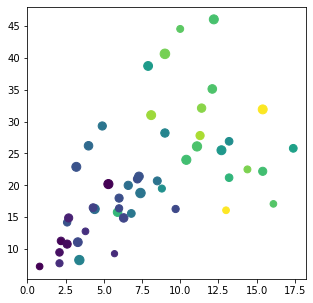

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(crime_norm['Murder'],crime_norm['Rape'],crime_norm['UrbanPop'],crime_norm['Assault'])


In [10]:
crime_norm.iloc[:,:].groupby(crime_norm.clusters_H).mean()

,Murder,Assault,UrbanPop,Rape
clusters_H,,,,
0,8.214286,173.285714,70.642857,22.842857
1,11.471429,263.500000,69.142857,29.000000
2,2.950000,62.700000,53.900000,11.510000
3,14.200000,336.000000,62.500000,24.000000
4,5.590000,112.400000,65.600000,17.270000


C:\Users\hp\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


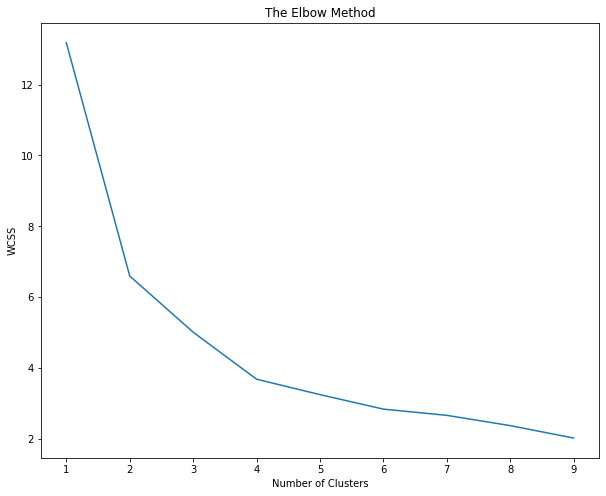

In [11]:
# Method 2 : K-means Clustering

crime = pd.read_csv("crime_data.csv")

from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i)
    clf.fit(crime_norm2)
    WCSS.append(clf.inertia_)               # inertia is another name for WCSS
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [13]:
# slope is getting constant at number of clusters = 6
crime_k = KMeans(n_clusters= 4, random_state = 0)
cluster_K = crime_k.fit_predict(crime_norm2)
cluster_K


array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [14]:
crime_data['cluster_K'] = pd.Series(cluster_K) 
crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_K
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [15]:
crime_data.iloc[:, 1:].groupby(crime_data.cluster_K).mean()

,Murder,Assault,UrbanPop,Rape,cluster_K
cluster_K,,,,,
0,10.966667,264.000000,76.500000,33.608333,0
1,5.852941,141.176471,73.647059,19.335294,1
2,13.937500,243.625000,53.750000,21.412500,2
3,3.600000,78.538462,52.076923,12.176923,3


<AxesSubplot:xlabel='Assault', ylabel='UrbanPop'>

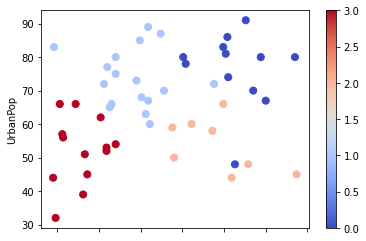

In [18]:
crime_data.plot(x = "Assault", y = "UrbanPop", c = crime_k.labels_, kind = 'scatter', s= 50, cmap = plt.cm.coolwarm)

<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

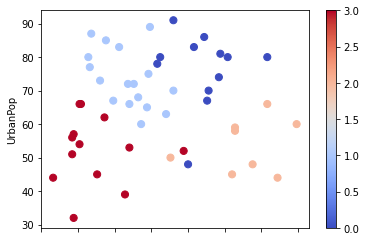

In [19]:
crime_data.plot(x = "Murder", y = "UrbanPop", c = crime_k.labels_, kind = 'scatter', s= 50, cmap = plt.cm.coolwarm)

<AxesSubplot:xlabel='Rape', ylabel='UrbanPop'>

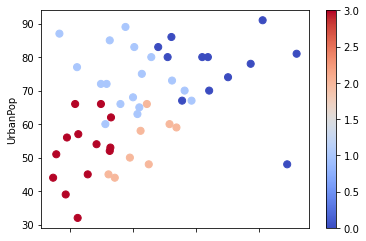

In [21]:
crime_data.plot(x = "Rape", y = "UrbanPop", c = crime_k.labels_, kind = 'scatter', s= 50, cmap = plt.cm.coolwarm)

In [24]:
# Method (3) : DB-Scan method

crime_db = pd.read_csv("crime_data.csv")
crime_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
crime_db = pd.DataFrame(crime_db.iloc[0:,1:])
crime_db.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [26]:
array_1 = crime_db.values
array_1

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [29]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
X = SS.fit_transform(array_1)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [30]:
# Initialize DB Scan Model
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.25, min_samples=5)       
dbscan.fit(X)

DBSCAN(eps=1.25)

In [31]:
d1 = dbscan.labels_
d1

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [32]:
import sklearn as sk
sk.metrics.silhouette_score(X, d1)

0.23869670053300915

In [33]:
CL = pd.DataFrame(d1, columns= ['Cluster'])
CL

,Cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [41]:
df_net = pd.concat([crime_db, CL], axis=1)
df_net

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


Text(0.5, 1.0, 'Clusters using DBScan')

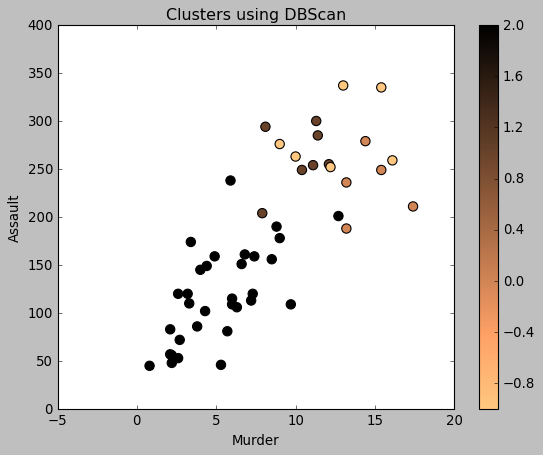

In [42]:
import matplotlib.pyplot as plt
plt.style.use('classic') 

df_net.plot(x= "Murder", y ="Assault", c= dbscan.labels_ ,kind="scatter",s=70 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

### Example (2) : East West Airlines

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In [18]:
data = pd.read_csv('EastWestAirlines.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.shape

(3999, 12)

In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [19]:
# Normalize the data to eliminate the effect of measuring unit
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
normdata= pd.DataFrame(norm.fit_transform(Air_data.iloc[:,1:]))
normdata

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


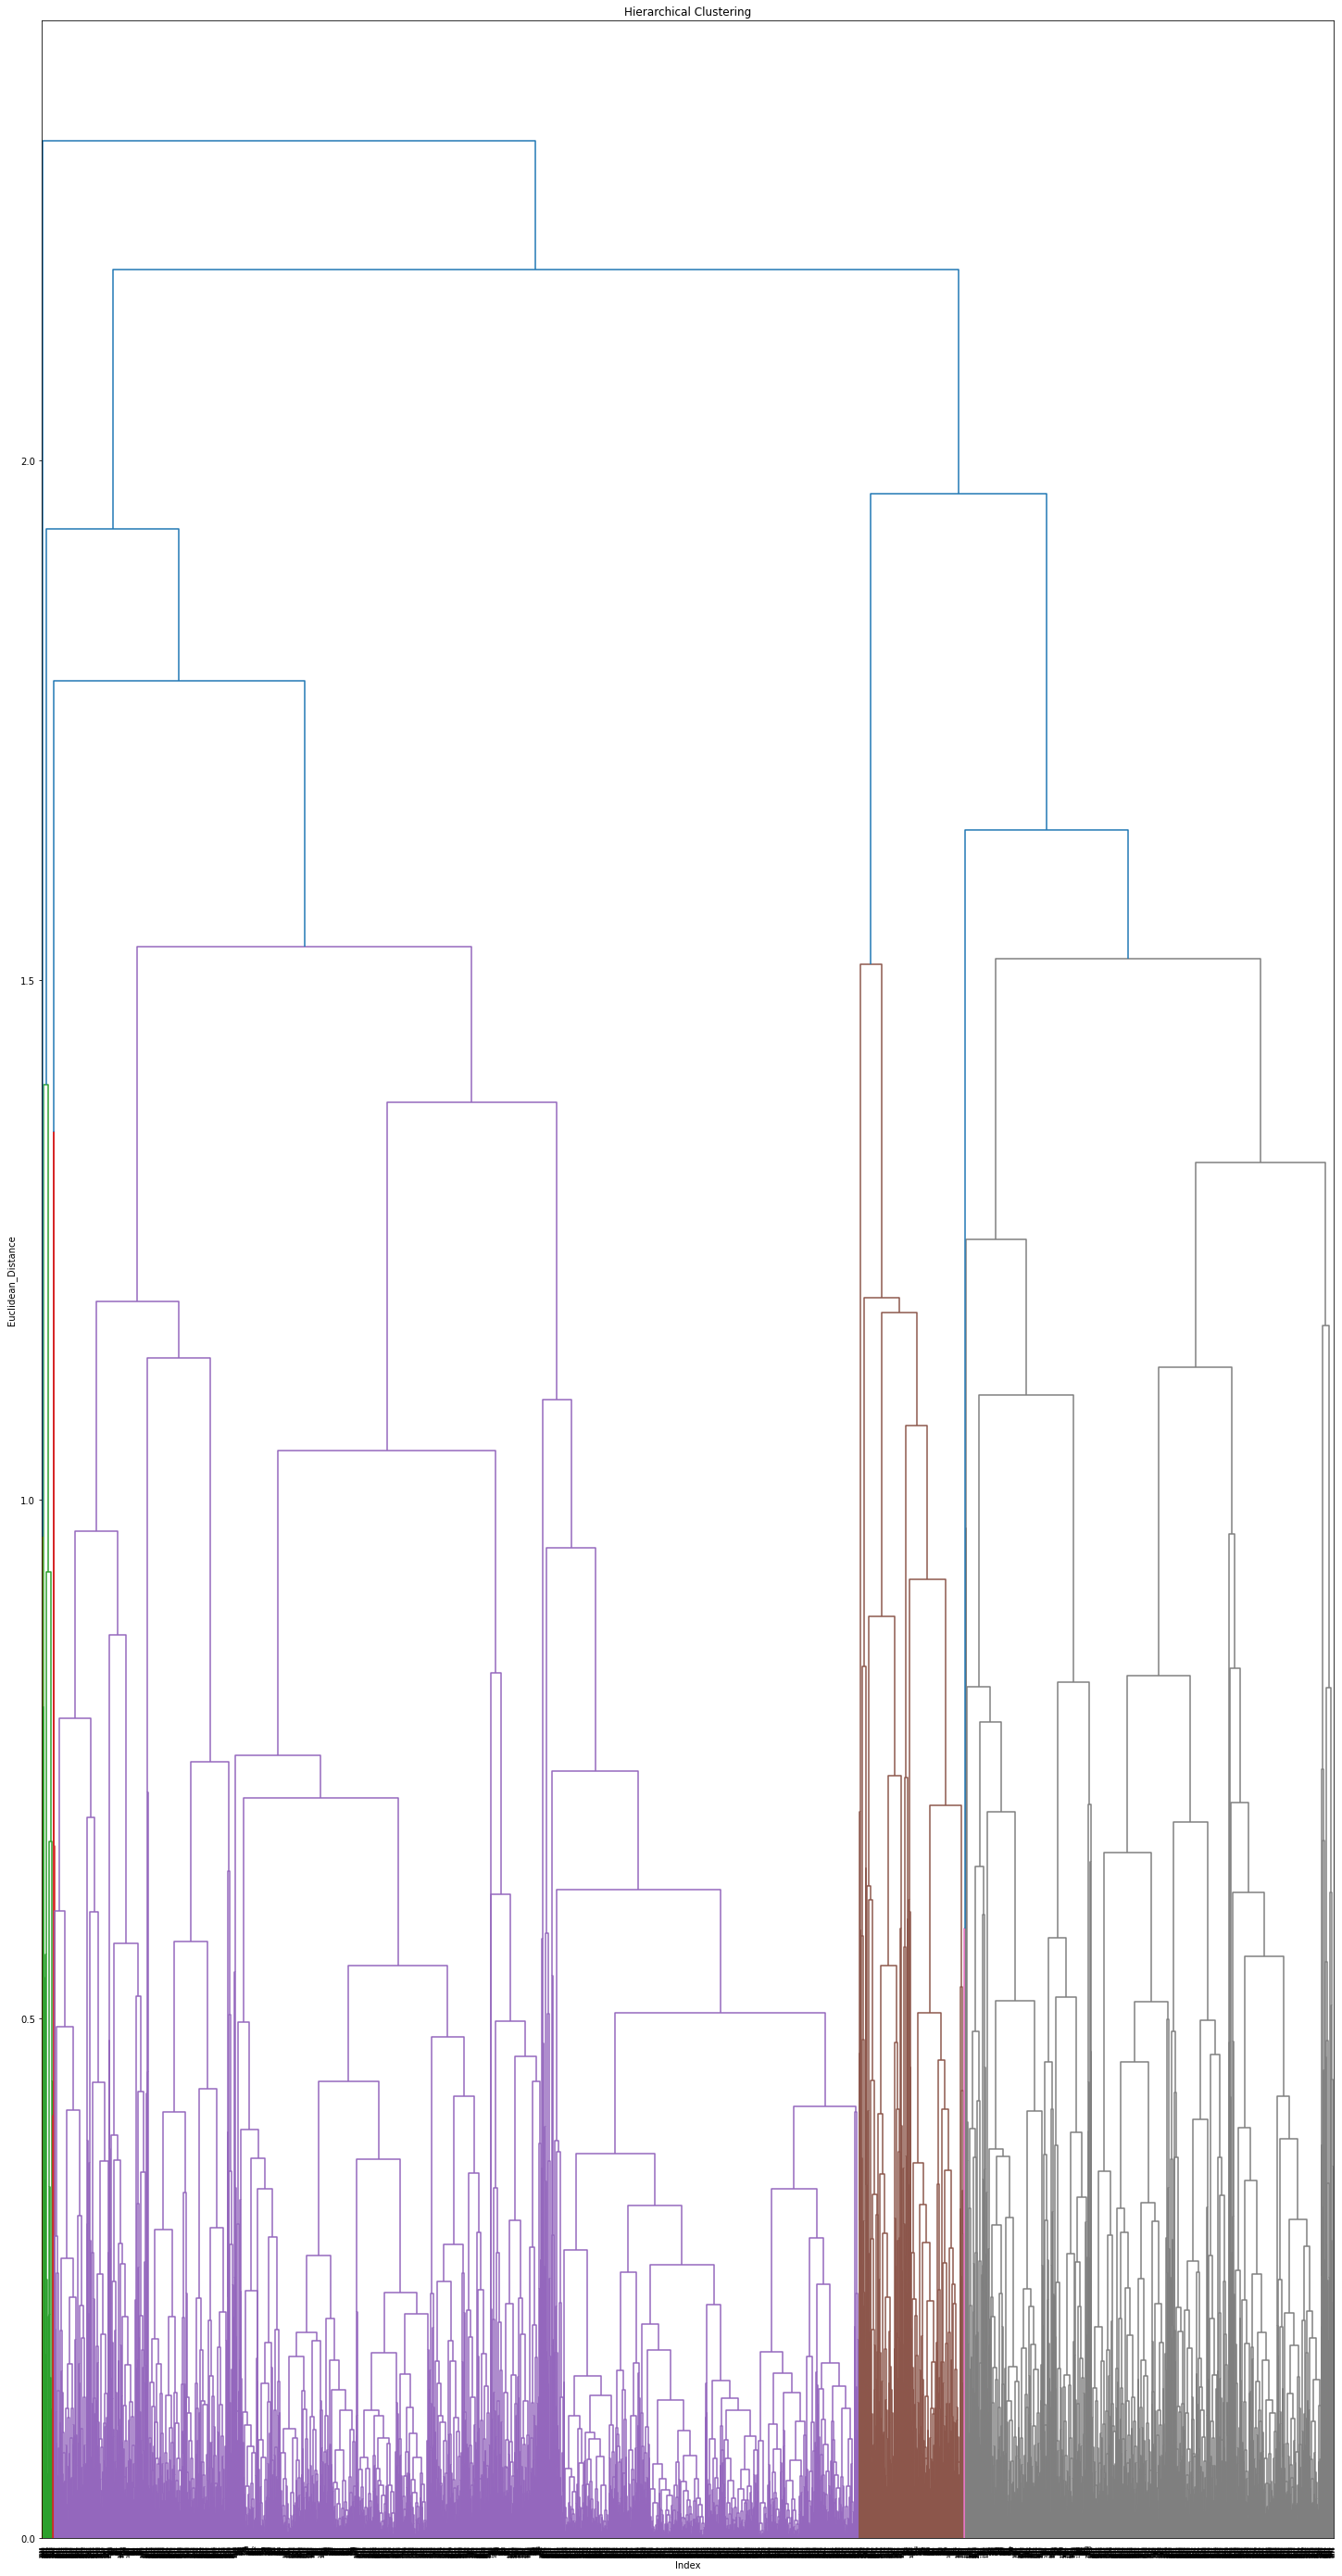

In [9]:
# Method 1 : Hierarchy Clustering

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

H_air= linkage(normdata, method= "complete", metric= "euclidean")
plt.figure(figsize=(25,50))
plt.title('Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean_Distance')
sch.dendrogram(H_air)
plt.show()

In [11]:
# Since the number of observations are more i.e. greater than 1000, we are getting complex Dendrogram. K-Means will be more suitable for this dataset. Approximating number of clusters = 10

# Clustering of Observations

from sklearn.cluster import AgglomerativeClustering

Air_agg = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity='euclidean' ).fit(normdata)

data['cluster_H'] = pd.Series(Air_agg.labels_)
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_H
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,3
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3


In [12]:
data.iloc[:,1:].groupby(data.cluster_H).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_H
cluster_H,,,,,,,,,,,,
0,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,0
1,64338.573333,219.888000,2.313333,1.008000,1.001333,19187.393333,13.530667,660.120000,1.982667,3256.822667,1.000000,1
2,45074.547804,90.659432,1.187080,1.000000,1.000517,3895.703876,6.797933,230.889406,0.674935,3844.252713,0.000000,2
3,109881.125641,215.915385,1.684615,1.012821,1.000000,12276.261538,13.128205,895.956410,2.733333,6302.107692,1.000000,3
4,158471.564263,212.598746,4.661442,1.000000,1.000000,69417.231975,23.059561,1030.771160,3.235110,5789.893417,1.000000,4
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000,5
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000,6
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,7
8,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000,8


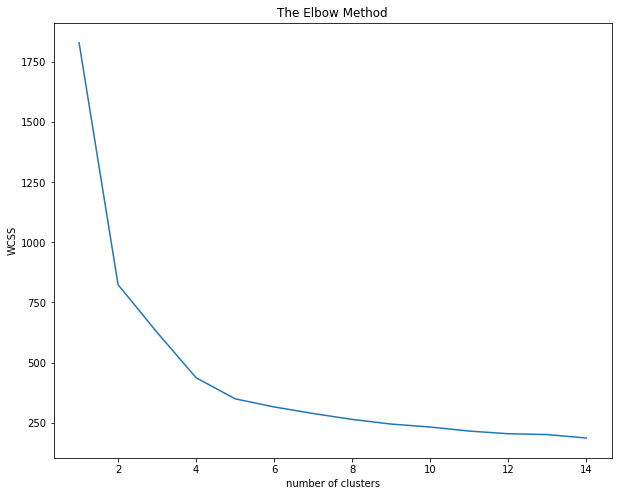

In [20]:
# Method 2 : K-means Clustering

from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 15):
    clf = KMeans(n_clusters=i)
    clf.fit(normdata)
    WCSS.append(clf.inertia_)    # inertia is another name for WCSS
plt.plot(range(1, 15), WCSS)  
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('number of clusters')
plt.show()


In [21]:
# slope is getting constant at cluster number 5
K_airdata = KMeans(n_clusters=5)
y_Kmeans = K_airdata.fit_predict(normdata)
data['cluster_K'] = pd.Series(y_Kmeans)
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_K
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
data.iloc[:,1:].groupby(data['cluster_K']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_K
cluster_K,,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,2
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,3
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,4


<Figure size 1080x720 with 0 Axes>

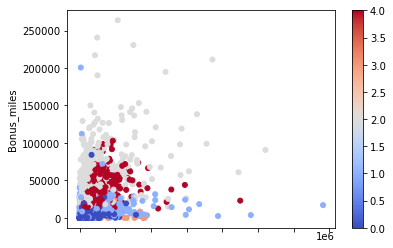

In [25]:
data.plot(x = "Balance", y = "Bonus_miles", c = K_airdata.labels_, kind = 'scatter', s= 25, cmap = plt.cm.coolwarm)

In [26]:
# Method (3) : DB-Scan method

air_db = pd.read_csv("EastWestAirlines.csv")
air_db.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
air_db.drop(air_db.columns[[0]] , axis=1, inplace= True)
air_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
array_2 = air_db.values
array_2

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [29]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

STD = StandardScaler()
X2 = STD.fit_transform(array_2)
X2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [37]:
# Initialize DB Scan Model
from sklearn.cluster import DBSCAN
db_air = DBSCAN(eps=1.25, min_samples=12)                   
db_air.fit(X2) 

DBSCAN(eps=1.25, min_samples=12)

In [38]:
d2 = db_air.labels_
d2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
import sklearn as sk
sk.metrics.silhouette_score(X2, d2)

0.23560284008112886

In [39]:
Clust = pd.DataFrame(d2, columns= ['Clsuter_db '])
air_final = pd.concat([air_db,Clust], axis=1)
air_final.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clsuter_db
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1


Text(0.5, 1.0, 'Clusters using DBScan')

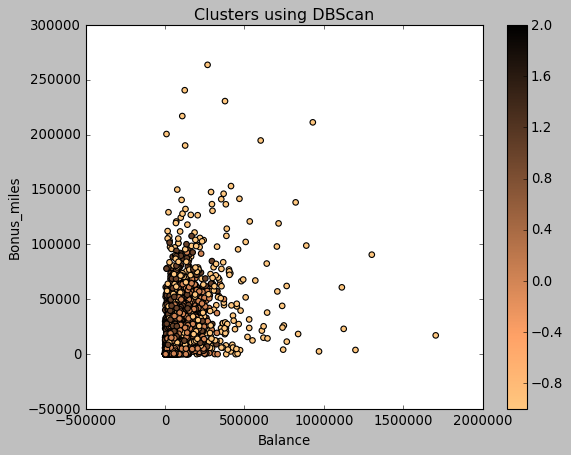

In [41]:
import matplotlib.pyplot as plt
plt.style.use('classic') 

air_final.plot(x= "Balance", y ="Bonus_miles", c=db_air.labels_ ,kind="scatter",s=25 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 